# Task 2, Ivan Dubinin

In [296]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

### Rosenbrock function

In [297]:
def rosenbrock_f(x,y):
    return (1-x)**2 + 100*(y-x**2)**2

def rosenbrock_dfdx(x,y):
    return -2*(1-x)+100*2*(y-x**2)*(-2)*x

def rosenbrock_dfdy(x,y):
    return 100*2*(y-x**2)

# gradient vector [df/dx, df/dy]
def rosenbrock_grad_vector(x,y):
    return np.array([rosenbrock_dfdx(x,y), rosenbrock_dfdy(x,y)])

### Simple parabaloid function

In [298]:
def simple_f(x,y):
    return x**2 + y**2 + 1

def simple_dfdx(x,y):
    return 2*x

def simple_dfdy(x,y):
    return 2*y

# gradient vector [df/dx, df/dy]
def simple_grad_vector(x,y):
    return np.array([simple_dfdx(x,y), simple_dfdy(x,y)])

Plotting functions

In [299]:
def contour_plot(obj_func,x_seq,y_seq, eq_dist):

    x = np.arange(-5, 5, 0.1)
    y = np.arange(-6, 18, 0.1)
    X, Y = np.meshgrid(x, y)
    Z = obj_func(X,Y)
    plt.figure(2, figsize=(20, 6))
    
    plt.subplot(121)
    CS = plt.contour(X, Y, Z, cmap=cm.RdBu)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.plot(x_seq,y_seq,'ro')

    plt.subplot(122)
    plt.plot( np.linspace(1, eq_dist.size, eq_dist.size), eq_dist)


def print_plots_func(obj_func):
    x = np.arange(-5, 5, 0.1)
    y = np.arange(-8, 20, 0.1)
    X, Y = np.meshgrid(x, y)
    Z = obj_func(X,Y)

    fig = plt.figure(1, figsize = (15, 5))
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                        cmap=cm.RdBu,linewidth=0, antialiased=False)

    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    fig.colorbar(surf, shrink = 0.7, aspect=5)
    plt.show()



## Gradient Descent realization

In [300]:
def grad_descent_mult(x_prev,learn_rate,grad_vector):
    
    epsilon = 0.00001
    grad_itter = 1
    
    seq_x = [x_prev[0]]
    seq_y = [x_prev[1]]
    euc_dist = []

    x_next = x_prev - learn_rate*grad_vector(x_prev[0],x_prev[1])
    seq_x = np.append(seq_x, x_next[0])
    seq_y = np.append(seq_y, x_next[1])
    
    
    while np.linalg.norm(x_next - x_prev) > epsilon:
        euc_dist = np.append(euc_dist, np.linalg.norm(x_next - x_prev))
        x_prev = x_next
        x_next = x_prev - learn_rate*grad_vector(x_prev[0],x_prev[1])
        grad_itter += 1
        
        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])
    
    return (x_next, grad_itter, seq_x, seq_y, euc_dist)

### Gradient descent for Rosenbrock function

Minimum (x,y) from gradient descent: [1.05852559 1.12070251]
Number of gradient descent iterations: 117827


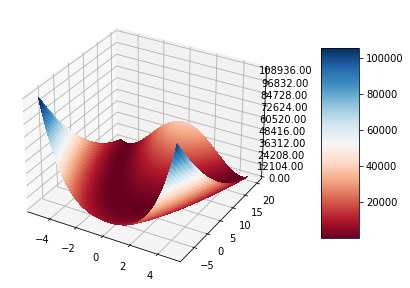

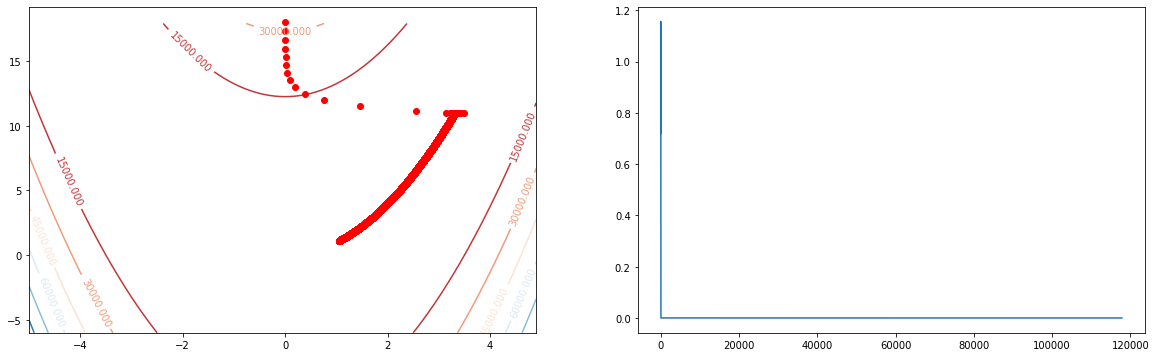

In [301]:

start_point = np.array([0,18])
final_point, num_iter, x_sequence, y_sequence, euc_distances = grad_descent_mult(start_point, 0.0002, rosenbrock_grad_vector)

print('Minimum (x,y) from gradient descent: %s' %final_point)
print('Number of gradient descent iterations: %s' %num_iter)

print_plots_func(rosenbrock_f)
contour_plot( rosenbrock_f, x_sequence, y_sequence, euc_distances)


### Gradient descent for simple Parabaloid function

Minimum (x,y) from gradient descent: [6.39484943e-05 2.30214579e-04]
Number of gradient descent iterations: 276


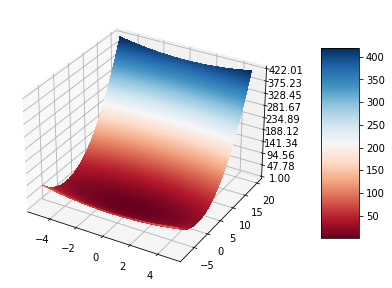

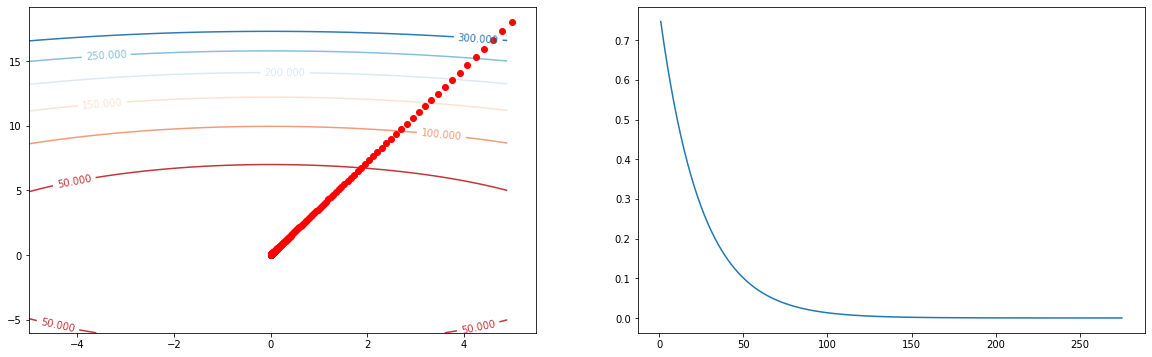

In [302]:

start_point = np.array([5,18])
final_point, num_iter, x_sequence, y_sequence, euc_distances = grad_descent_mult(start_point, 0.02, simple_grad_vector)

print('Minimum (x,y) from gradient descent: %s' %final_point)
print('Number of gradient descent iterations: %s' %num_iter)

print_plots_func(simple_f)
contour_plot( simple_f, x_sequence, y_sequence, euc_distances)


## ADAM Realization

In [303]:
# ADAM algorithm
beta_1 = 0.9
beta_2 = 0.999
epsilon = 0.00000001

def corr_val(value, coef, t):
    corr_val_x = value[0]/(1-coef**t)
    corr_val_y = value[1]/(1-coef**t)
    return np.array([corr_val_x,corr_val_y])


In [304]:
# ADAM algorithm

def adam_mult(x_prev,learn_rate,grad_vector):

    t_iter = 1
    
    seq_x = [x_prev[0]]
    seq_y = [x_prev[1]]
    euc_dist = []

    
    grad_vec = grad_vector(x_prev[0],x_prev[1])

    v_val = (1-beta_2) * np.power( grad_vec, 2) 
    s_val = (1-beta_1) * grad_vec

    v_val_corr = corr_val(v_val, beta_2, t_iter)
    s_val_corr = corr_val(s_val, beta_1, t_iter)

    x_next = x_prev - learn_rate * s_val_corr / (np.sqrt(v_val_corr) + epsilon)

    seq_x = np.append(seq_x, x_next[0])
    seq_y = np.append(seq_y, x_next[1])
    
    
    while np.linalg.norm(x_next - x_prev) > epsilon:
        euc_dist = np.append(euc_dist, np.linalg.norm(x_next - x_prev))

        x_prev = x_next

        grad_vec = grad_vector(x_prev[0],x_prev[1])

        v_val = beta_2*v_val + (1-beta_2) * np.power( grad_vec, 2)
        v_val_corr = corr_val(v_val, beta_2, t_iter)

        s_val = beta_1*s_val + (1-beta_1) * grad_vec
        s_val_corr = corr_val(s_val, beta_1, t_iter)

        x_next = x_prev - learn_rate * s_val_corr / (np.sqrt(v_val_corr) + epsilon)

        t_iter += 1
        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])
    
    return (x_next, t_iter, seq_x, seq_y, euc_dist)

### ADAM for simple Parabaloid function

Minimum (x,y) from gradient descent: [3.26947536e-09 2.96049456e-06]
Number of gradient descent iterations: 386


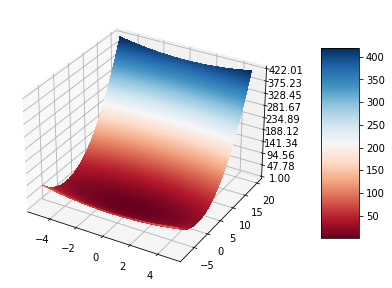

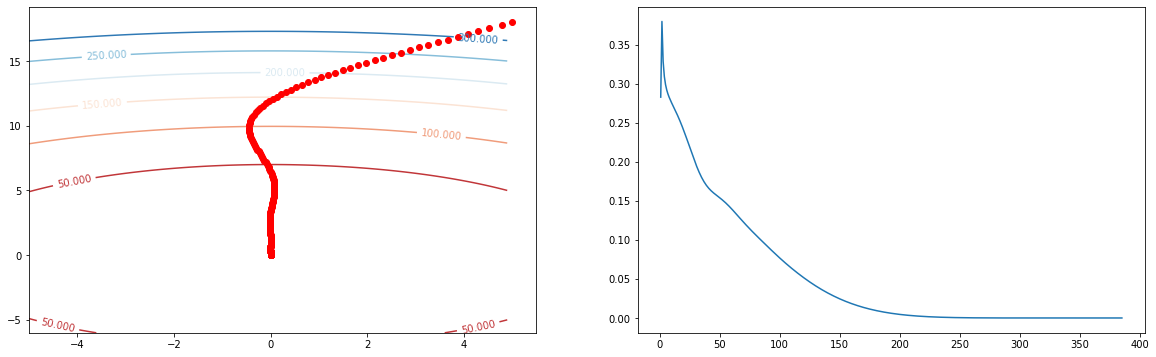

In [305]:
start_point = np.array([5,18])
final_point, num_iter, x_sequence, y_sequence, euc_distances = adam_mult(start_point, 0.2, simple_grad_vector)

print('Minimum (x,y) from gradient descent: %s' %final_point)
print('Number of gradient descent iterations: %s' %num_iter)

print_plots_func(simple_f)
contour_plot( simple_f, x_sequence, y_sequence, euc_distances)


### ADAM for Rosenbrock function

Minimum (x,y) from gradient descent: [1.00000043 1.00000086]
Number of gradient descent iterations: 14664


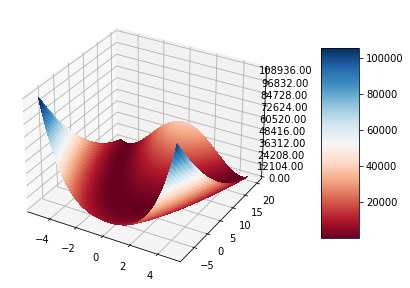

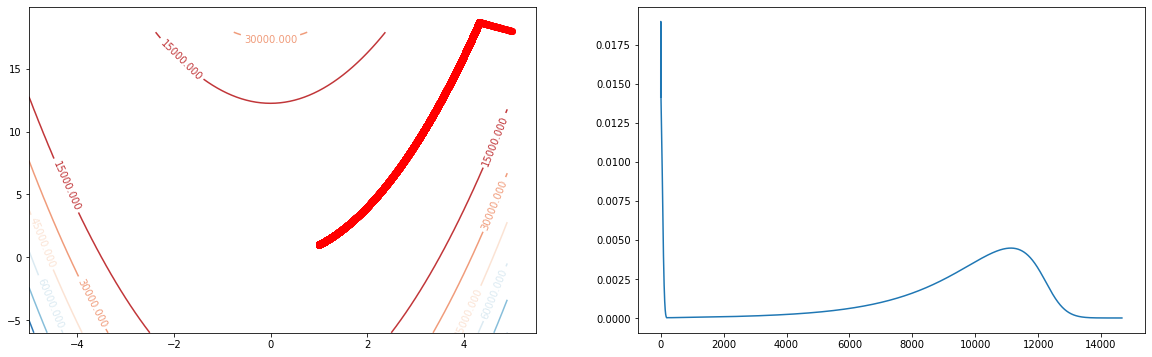

In [307]:
start_point = np.array([5,18])
final_point, num_iter, x_sequence, y_sequence, euc_distances = adam_mult(start_point, 0.01, rosenbrock_grad_vector)

print('Minimum (x,y) from gradient descent: %s' %final_point)
print('Number of gradient descent iterations: %s' %num_iter)

print_plots_func(rosenbrock_f)
contour_plot( rosenbrock_f, x_sequence, y_sequence, euc_distances)
